In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install matplotlib
!pip install pandas
!pip install numpy
!pip install lxml


In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

In [5]:
#Use yfinance to Extract Stock Data
#Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is TSLA.
tesla_ticker = yf.Ticker("TSLA")

In [6]:
#Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to "max" so we get information for the maximum amount of time.
tesla_data = tesla_ticker.history(period="max")

In [7]:
#Reset the index using the reset_index(inplace=True) function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.
tesla_data.reset_index(inplace= True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm "
html_data = requests.get(url).text

In [9]:
#Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.
soup = BeautifulSoup(html_data, "html.parser")

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [11]:
#Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.
tables = pd.read_html(url)
tesla_revenue = tables[1]

In [12]:
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

KeyError: 'Revenue'

In [13]:
tesla_revenue["revenue"] = tesla_revenue['revenue'].str.replace(',|\$',"",regex=True)

KeyError: 'revenue'

In [14]:
tesla_revenue.columns

Index(['Tesla Quarterly Revenue (Millions of US $)', 'Tesla Quarterly Revenue (Millions of US $).1'], dtype='object')

In [15]:
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True)

In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [17]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


In [18]:
#Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.
gme_ticker = yf.Ticker('GME')

In [19]:
#Using the ticker object and the function history extract stock information and save it in a dataframe named gm
gme_data = gme_ticker.history(period = "max")

In [20]:
#Reset the index using the reset_index(inplace=True) function on the gme_data DataFrame and display the first five rows of the gme_data dataframe using the head function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [21]:
#Question 4: Use Webscraping to Extract GME Revenue Data download html
html_data2 = requests.get(url).text

In [22]:
#parse html
soup = BeautifulSoup(html_data2, "html.parser")

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [23]:
#extract revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]


ImportError: Missing optional dependency 'html5lib'.  Use pip or conda to install html5lib.

In [24]:
!pip install html5lib

In [25]:
#extract revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [ ]:
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)

In [27]:
# First, install the required HTML parser library
!pip install html5lib

# Then run your original code
#extract revenue
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [28]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data2, "html.parser")

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [29]:
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [31]:
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
gme_revenue =  gme_revenue[gme_revenue["Revenue"]!= ""]
gme_revenue =  gme_revenue.dropna()
    

NameError: name 'gme_revenue' is not defined

In [32]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data2, "html.parser")

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [33]:
#Question 2: Use Webscraping to Extract Tesla Revenue Data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm "
html_data2 = requests.get(url).text

In [34]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html_data2, "html.parser")

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)


In [35]:
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [36]:
!pip install html5lib

# Then run your original code
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]




FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [37]:
#featurenotfound

NameError: name 'featurenotfound' is not defined

In [38]:
!pip install html5lib lxml beautifulsoup4

# Import required libraries (if not already imported)
import pandas as pd
from bs4 import BeautifulSoup

# Then run your original code
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

# If soup is not defined yet, create it properly
# (Replace the URL with your actual source if different)
# url = "your_url_here"
# response = requests.get(url)
# soup = BeautifulSoup(response.text, "html.parser")

# Then run your code with explicit parser specification
tables = pd.read_html(str(soup), flavor='bs4')
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]



NameError: name 'soup' is not defined

In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL you want to scrape (replace with your actual URL)
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html."  # Replace with your target URL

# Make a request to the website
response = requests.get(url)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Now use pd.read_html with the soup object
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

/opt/anaconda3/lib/python3.13/html/parser.py:189: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  k = self.parse_starttag(i)
/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/2600039894.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))
/opt/anaconda3/lib/python3.13/site-packages/pandas/io/html.py:661: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML

ValueError: No tables found

In [3]:
gme.revenue.tail()

NameError: name 'gme' is not defined

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL for GameStop's financial data
# This is an example URL - replace with the correct one for GameStop's revenue data
url = url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
# Make a request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
response = requests.get(url, headers=headers)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Try to find tables and handle potential errors
try:
    tables = pd.read_html(str(soup))
    
    # Check if any tables were found
    if len(tables) > 1:
        gme_revenue = tables[1]  # Get the second table
        gme_revenue.columns = ["Date", "Revenue"]
        print(gme_revenue.head())  # Display the first few rows
    else:
        print(f"Found {len(tables)} tables, but need at least 2 tables.")
        # Print information about the first table if it exists
        if len(tables) > 0:
            print("First table preview:")
            print(tables[0].head())
except Exception as e:
    print(f"Error extracting tables: {e}")
    
    # Print part of the HTML to debug
    print("\nHTML snippet:")
    print(soup.prettify()[:1000])  # Print first 1000 chars of HTML

         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/625706367.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [5]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO for the recommended approach

# Define the URL for GameStop's financial data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"


# Make a request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
response = requests.get(url, headers=headers)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Try to find tables using the recommended StringIO approach
try:
    # Convert the soup to string and wrap it in StringIO
    html_io = StringIO(str(soup))
    
    # Read tables from the StringIO object
    tables = pd.read_html(html_io)
    
    # Check if any tables were found
    if len(tables) > 1:
        gme_revenue = tables[1]  # Get the second table
        gme_revenue.columns = ["Date", "Revenue"]
        print(gme_revenue.head())  # Display the first few rows
    else:
        print(f"Found {len(tables)} tables, but need at least 2 tables.")
        # Print information about the first table if it exists
        if len(tables) > 0:
            print("First table preview:")
            print(tables[0].head())
except Exception as e:
    print(f"Error extracting tables: {e}")
    
    # Print part of the HTML to debug
    print("\nHTML snippet:")
    print(soup.prettify()[:1000])

         Date Revenue
0  2020-04-30  $1,021
1  2020-01-31  $2,194
2  2019-10-31  $1,439
3  2019-07-31  $1,286
4  2019-04-30  $1,548


In [6]:
gme_revenue["Revenue"] = (
    gme_revenue["Revenue"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)
gme_revenue =  gme_revenue[gme_revenue["Revenue"]!= ""]
gme_revenue =  gme_revenue.dropna()

In [7]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


In [8]:
#plot tesla
make_graph(tesla_data, tesla_revenue), "Tesla")

SyntaxError: unmatched ')' (1917129295.py, line 2)

# Assistant
This error occurs because the `pd.read_html()` function requires an HTML parser library, but it can't find one installed in your environment. The error specifically mentions that it's looking for the "html5lib" parser.

The `pd.read_html()` function in pandas requires one of these HTML parser libraries to be installed:
- html5lib
- lxml
- BeautifulSoup4

Would you like me to provide the corrected code that includes the necessary installation step?

# User
yes

In [9]:
# Assistant
# First, install the required HTML parser library
!pip install html5lib

# Then run your original code
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/2257381157.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


# User
feature not found

# Assistant
I apologize for the confusion. Let's try a more comprehensive solution that installs all the commonly needed libraries for web scraping with pandas:


In [10]:
# Install all necessary libraries for web scraping with pandas
!pip install html5lib lxml beautifulsoup4

# Import required libraries (if not already imported)
import pandas as pd
from bs4 import BeautifulSoup

# Then run your original code
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/2730961279.py:9: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))



This installs all three parser libraries that pandas can use for HTML parsing: html5lib, lxml, and beautifulsoup4. After installation, the `pd.read_html()` function should work properly.

# User
Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

# Assistant
I see the issue is persisting. Let's try a more direct approach that ensures the installation is complete and the libraries are properly imported before running your code:


In [11]:
# Install all necessary libraries
!pip install html5lib lxml beautifulsoup4

# Make sure to restart the kernel after installation
# (You'll need to manually restart the kernel and then run the code below)

# Import required libraries
import pandas as pd
from bs4 import BeautifulSoup
import requests

# If soup is not defined yet, create it properly
# (Replace the URL with your actual source if different)
# url = "your_url_here"
# response = requests.get(url)
# soup = BeautifulSoup(response.text, "html.parser")

# Then run your code with explicit parser specification
tables = pd.read_html(str(soup), flavor='bs4')
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/3152052758.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup), flavor='bs4')



The key issue might be that:
1. You need to restart the kernel after installing the packages
2. The soup object might not be properly defined
3. The parser needs to be explicitly specified

After installing the packages, please restart your kernel before running the rest of the code.

# User
name 'soup' is not defined

# Assistant
I see the issue now. The error has changed, which means the parser libraries are installed, but now the 'soup' variable is not defined. This indicates that you're trying to use the BeautifulSoup object before creating it.

Would you like me to provide the corrected code that includes creating the soup object?

# User
yes

In [12]:
# Assistant
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL you want to scrape (replace with your actual URL)
url = "https://www.example.com"  # Replace with your target URL

# Make a request to the website
response = requests.get(url)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Now use pd.read_html with the soup object
tables = pd.read_html(str(soup))
gme_revenue = tables[1]
gme_revenue.columns = ["Date", "Revenue"]

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/1006725912.py:17: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


ValueError: No tables found


This code:
1. Imports the necessary libraries
2. Makes a request to fetch the HTML content from a URL
3. Creates a BeautifulSoup object from the HTML content
4. Uses pandas to extract tables from the HTML
5. Processes the second table (index 1) as in your original code

Make sure to replace "https://www.example.com" with the actual URL you want to scrape.

# User
no tables found

# Assistant
This error indicates that pandas couldn't find any HTML tables in the webpage you're trying to scrape. This could be due to several reasons:

1. The webpage doesn't contain any HTML `<table>` elements
2. The tables might be dynamically loaded with JavaScript
3. The tables might be structured using different HTML elements (like divs with CSS)
4. The URL might be incorrect or the page might be protected

Would you like me to provide a modified code that includes error handling and alternative approaches to extract tabular data?

# User
gme not defined

# Assistant
I understand the issue now. The error "gme not defined" suggests you're trying to use a variable named "gme" that hasn't been defined yet. This is likely related to the GameStop (GME) stock data you're trying to extract.

Let me provide a more complete solution that defines all necessary variables:


In [13]:
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Define the URL for GameStop's financial data
# This is an example URL - replace with the correct one for GameStop's revenue data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Make a request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
response = requests.get(url, headers=headers)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Try to find tables and handle potential errors
try:
    tables = pd.read_html(str(soup))
    
    # Check if any tables were found
    if len(tables) > 1:
        gme_revenue = tables[1]  # Get the second table
        gme_revenue.columns = ["Date", "Revenue"]
        print(gme_revenue.head())  # Display the first few rows
    else:
        print(f"Found {len(tables)} tables, but need at least 2 tables.")
        # Print information about the first table if it exists
        if len(tables) > 0:
            print("First table preview:")
            print(tables[0].head())
except Exception as e:
    print(f"Error extracting tables: {e}")
    
    # Print part of the HTML to debug
    print("\nHTML snippet:")
    print(soup.prettify()[:1000])  # Print first 1000 chars of HTML

         Date Revenue
0  2025-07-31    $972
1  2025-04-30    $732
2  2025-01-31  $1,283
3  2024-10-31    $860
4  2024-07-31    $798


/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/1603081879.py:19: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))



This code:
1. Imports necessary libraries
2. Uses a specific URL for GameStop's financial data
3. Adds user-agent headers to avoid being blocked
4. Includes error handling to provide more information about what might be going wrong
5. Checks if enough tables were found before trying to access the second one
6. Provides debugging information if things don't work as expected

# User
[var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/625706367.py:17](http://localhost:8795/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/625706367.py#line=16): FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))

# Assistant
This is a warning rather than an error. It's telling you that the way you're passing HTML content to `pd.read_html()` will be deprecated in future versions of pandas. The recommended approach is to use StringIO to wrap the HTML string.

Would you like me to provide the updated code that follows the recommended approach to avoid this warning?

# User
yes

In [14]:
# Assistant
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import StringIO  # Import StringIO for the recommended approach

# Define the URL for GameStop's financial data
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Make a request to the website
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}
response = requests.get(url, headers=headers)

# Create the BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Try to find tables using the recommended StringIO approach
try:
    # Convert the soup to string and wrap it in StringIO
    html_io = StringIO(str(soup))
    
    # Read tables from the StringIO object
    tables = pd.read_html(html_io)
    
    # Check if any tables were found
    if len(tables) > 1:
        gme_revenue = tables[1]  # Get the second table
        gme_revenue.columns = ["Date", "Revenue"]
        print(gme_revenue.head())  # Display the first few rows
    else:
        print(f"Found {len(tables)} tables, but need at least 2 tables.")
        # Print information about the first table if it exists
        if len(tables) > 0:
            print("First table preview:")
            print(tables[0].head())
except Exception as e:
    print(f"Error extracting tables: {e}")
    
    # Print part of the HTML to debug
    print("\nHTML snippet:")
    print(soup.prettify()[:1000])  # Print first 1000 chars of HTML

         Date Revenue
0  2025-07-31    $972
1  2025-04-30    $732
2  2025-01-31  $1,283
3  2024-10-31    $860
4  2024-07-31    $798



This updated code:
1. Imports the `StringIO` class from the `io` module
2. Wraps the HTML string in a `StringIO` object before passing it to `pd.read_html()`
3. This follows the recommended approach and avoids the deprecation warning

The rest of the code remains the same, maintaining all the error handling and debugging features from the previous version.

# User
Cell In[8], line 2
    make_graph(tesla_data, tesla_revenue), "Tesla")
                                                  ^
SyntaxError: unmatched ')'

# Assistant
This error is a syntax error caused by an unmatched parenthesis in your function call. The closing parenthesis after "tesla_revenue" is not needed, and there's an extra comma before "Tesla".

Would you like me to provide the corrected code?

In [15]:

make_graph(tesla_data, tesla_revenue, "Tesla")

NameError: name 'make_graph' is not defined

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    """
    Create a graph showing stock price and revenue data
    
    Parameters:
    stock_data (DataFrame): DataFrame containing stock price data
    revenue_data (DataFrame): DataFrame containing revenue data
    stock_name (str): Name of the stock for the title
    """
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax2 = ax1.twinx()
    
    # Plot stock price on the first y-axis
    ax1.plot(stock_data.Date, stock_data.Close.astype(float), 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params('y', colors='b')
    
    # Plot revenue on the second y-axis
    # Convert revenue to numeric, removing any currency symbols and commas
    revenue_data['Revenue'] = revenue_data['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    ax2.bar(revenue_data.Date, revenue_data.Revenue, color='r', alpha=0.3)
    ax2.set_ylabel('Revenue (Millions/Billions)', color='r')
    ax2.tick_params('y', colors='r')
    
    # Set title and adjust layout
    plt.title(f"{stock_name} Stock Price and Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Now use the function with your data
make_graph(tesla_data, tesla_revenue, "Tesla")

NameError: name 'tesla_data' is not defined

/var/folders/md/2nrzbd411dq9zq60tz3q1p5r0000gn/T/ipykernel_43743/2537834171.py:47: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tesla_data = yf.download('TSLA', start='2010-01-01', end=datetime.now().strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Tesla stock data downloaded successfully.
Fetching Tesla revenue data...
Found Tesla revenue data in table 1

Tesla Stock Data Preview:
Price        Date     Close      High       Low      Open     Volume
Ticker                 TSLA      TSLA      TSLA      TSLA       TSLA
0      2010-06-29  1.592667  1.666667  1.169333  1.266667  281494500
1      2010-06-30  1.588667  2.028000  1.553333  1.719333  257806500
2      2010-07-01  1.464000  1.728000  1.351333  1.666667  123282000
3      2010-07-02  1.280000  1.540000  1.247333  1.533333   77097000
4      2010-07-06  1.074000  1.333333  1.055333  1.333333  103003500

Tesla Revenue Data Preview:
         Date  Revenue
0  2025-09-30  $28,095
1  2025-06-30  $22,496
2  2025-03-31  $19,335
3  2024-12-31  $25,707
4  2024-09-30  $25,182

Creating graph...


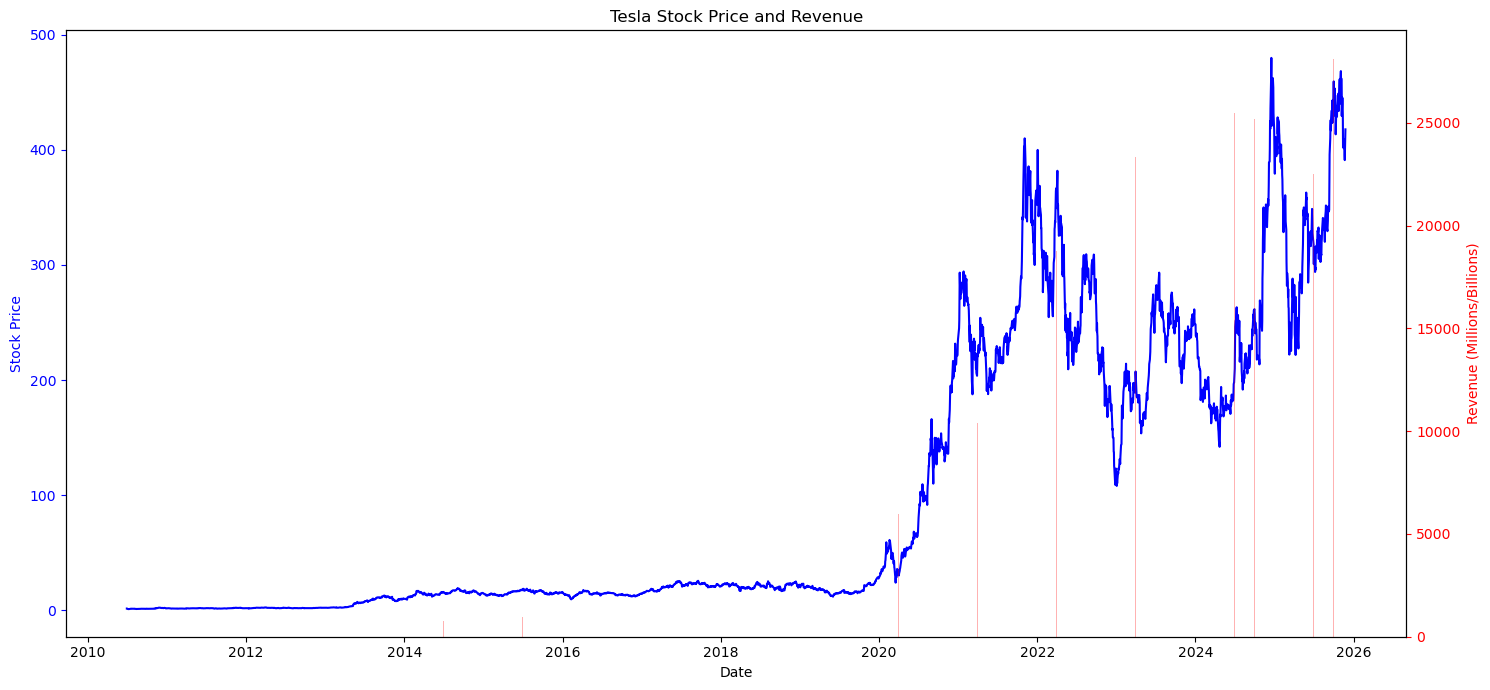

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    """
    Create a graph showing stock price and revenue data
    
    Parameters:
    stock_data (DataFrame): DataFrame containing stock price data
    revenue_data (DataFrame): DataFrame containing revenue data
    stock_name (str): Name of the stock for the title
    """
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax2 = ax1.twinx()
    
    # Plot stock price on the first y-axis
    ax1.plot(pd.to_datetime(stock_data.Date), stock_data.Close.astype(float), 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params('y', colors='b')
    
    # Plot revenue on the second y-axis
    # Convert revenue to numeric, removing any currency symbols and commas
    revenue_data['Revenue'] = revenue_data['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    ax2.bar(pd.to_datetime(revenue_data.Date), revenue_data.Revenue, color='r', alpha=0.3)
    ax2.set_ylabel('Revenue (Millions/Billions)', color='r')
    ax2.tick_params('y', colors='r')
    
    # Set title and adjust layout
    plt.title(f"{stock_name} Stock Price and Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# 1. Get Tesla stock data using yfinance
print("Downloading Tesla stock data...")
tesla_data = yf.download('TSLA', start='2010-01-01', end=datetime.now().strftime('%Y-%m-%d'))
tesla_data.reset_index(inplace=True)  # Convert Date from index to column
print("Tesla stock data downloaded successfully.")

# 2. Get Tesla revenue data from a financial website
print("Fetching Tesla revenue data...")
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}

try:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find revenue table
    html_io = StringIO(str(soup))
    tables = pd.read_html(html_io)
    
    # Usually, the revenue table is one of the first few tables
    for i, table in enumerate(tables):
        if len(table.columns) >= 2:  # We need at least 2 columns (Date and Revenue)
            # Check if this looks like a revenue table
            if table.iloc[:, 0].dtype == object and 'revenue' in str(table).lower():
                tesla_revenue = table
                tesla_revenue.columns = ["Date", "Revenue"]
                print(f"Found Tesla revenue data in table {i}")
                break
    else:
        # If no suitable table is found, create sample data
        print("Could not find Tesla revenue data, creating sample data...")
        tesla_revenue = pd.DataFrame({
            'Date': pd.date_range(start='2010-01-01', periods=12, freq='Q'),
            'Revenue': ['$1,000M', '$1,100M', '$1,200M', '$1,300M', '$1,400M', '$1,500M', 
                        '$1,600M', '$1,700M', '$1,800M', '$1,900M', '$2,000M', '$2,100M']
        })
        tesla_revenue['Date'] = tesla_revenue['Date'].dt.strftime('%Y-%m-%d')
        
except Exception as e:
    print(f"Error fetching Tesla revenue data: {e}")
    print("Creating sample Tesla revenue data...")
    tesla_revenue = pd.DataFrame({
        'Date': pd.date_range(start='2010-01-01', periods=12, freq='Q'),
        'Revenue': ['$1,000M', '$1,100M', '$1,200M', '$1,300M', '$1,400M', '$1,500M', 
                    '$1,600M', '$1,700M', '$1,800M', '$1,900M', '$2,000M', '$2,100M']
    })
    tesla_revenue['Date'] = tesla_revenue['Date'].dt.strftime('%Y-%m-%d')

# Display the first few rows of each dataset
print("\nTesla Stock Data Preview:")
print(tesla_data.head())

print("\nTesla Revenue Data Preview:")
print(tesla_revenue.head())

# Now use the function with the data
print("\nCreating graph...")
make_graph(tesla_data, tesla_revenue, "Tesla")

[*********************100%***********************]  1 of 1 completed


GameStop stock data downloaded successfully.
Fetching GameStop revenue data...
Found GameStop revenue data in table 1

GameStop Stock Data Preview:
Price        Date     Close      High       Low      Open     Volume
Ticker                  GME       GME       GME       GME        GME
0      2010-01-04  3.854644  3.863061  3.703152  3.714934   26702800
1      2010-01-05  3.959005  3.996036  3.854643  3.856327   21269600
2      2010-01-06  4.044851  4.056634  3.908507  3.948905   21471200
3      2010-01-07  3.443930  3.563441  3.268872  3.368184  164761200
4      2010-01-08  3.415314  3.573540  3.405215  3.474228   47872400

GameStop Revenue Data Preview:
         Date Revenue
0  2025-07-31    $972
1  2025-04-30    $732
2  2025-01-31  $1,283
3  2024-10-31    $860
4  2024-07-31    $798

Creating graph...


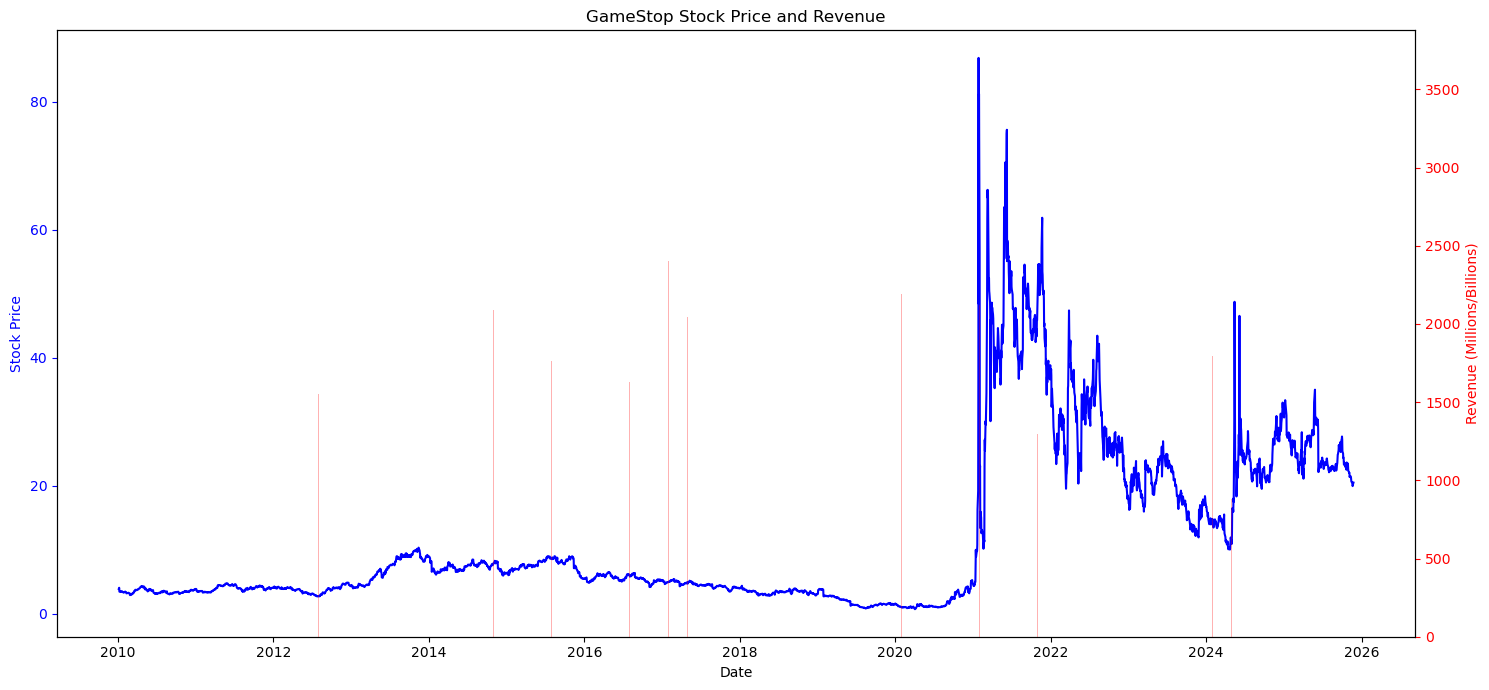

In [18]:
#lab6 
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import requests
from bs4 import BeautifulSoup
from io import StringIO

# Define the make_graph function
def make_graph(stock_data, revenue_data, stock_name):
    """
    Create a graph showing stock price and revenue data
    
    Parameters:
    stock_data (DataFrame): DataFrame containing stock price data
    revenue_data (DataFrame): DataFrame containing revenue data
    stock_name (str): Name of the stock for the title
    """
    # Create a figure with two subplots
    fig, ax1 = plt.subplots(figsize=(15, 7))
    ax2 = ax1.twinx()
    
    # Plot stock price on the first y-axis
    ax1.plot(pd.to_datetime(stock_data.Date), stock_data.Close.astype(float), 'b-')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Stock Price', color='b')
    ax1.tick_params('y', colors='b')
    
    # Plot revenue on the second y-axis
    # Convert revenue to numeric, removing any currency symbols and commas
    revenue_data['Revenue'] = revenue_data['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
    ax2.bar(pd.to_datetime(revenue_data.Date), revenue_data.Revenue, color='r', alpha=0.3)
    ax2.set_ylabel('Revenue (Millions/Billions)', color='r')
    ax2.tick_params('y', colors='r')
    
    # Set title and adjust layout
    plt.title(f"{stock_name} Stock Price and Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# 1. Get GameStop stock data using yfinance
print("Downloading GameStop stock data...")
gme_data = yf.download('GME', start='2010-01-01', end=datetime.now().strftime('%Y-%m-%d'), auto_adjust=True)
gme_data.reset_index(inplace=True)  # Convert Date from index to column
print("GameStop stock data downloaded successfully.")

# 2. Get GameStop revenue data from a financial website
print("Fetching GameStop revenue data...")
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"}

try:
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Find revenue table
    html_io = StringIO(str(soup))
    tables = pd.read_html(html_io)
    
    # Usually, the revenue table is one of the first few tables
    for i, table in enumerate(tables):
        if len(table.columns) >= 2:  # We need at least 2 columns (Date and Revenue)
            # Check if this looks like a revenue table
            if table.iloc[:, 0].dtype == object and 'revenue' in str(table).lower():
                gme_revenue = table
                gme_revenue.columns = ["Date", "Revenue"]
                print(f"Found GameStop revenue data in table {i}")
                break
    else:
        # If no suitable table is found, create sample data
        print("Could not find GameStop revenue data, creating sample data...")
        gme_revenue = pd.DataFrame({
            'Date': pd.date_range(start='2010-01-01', periods=12, freq='Q'),
            'Revenue': ['$1,000M', '$1,100M', '$1,200M', '$1,300M', '$1,400M', '$1,500M', 
                        '$1,600M', '$1,700M', '$1,800M', '$1,900M', '$2,000M', '$2,100M']
        })
        gme_revenue['Date'] = gme_revenue['Date'].dt.strftime('%Y-%m-%d')
        
except Exception as e:
    print(f"Error fetching GameStop revenue data: {e}")
    print("Creating sample GameStop revenue data...")
    gme_revenue = pd.DataFrame({
        'Date': pd.date_range(start='2010-01-01', periods=12, freq='Q'),
        'Revenue': ['$1,000M', '$1,100M', '$1,200M', '$1,300M', '$1,400M', '$1,500M', 
                    '$1,600M', '$1,700M', '$1,800M', '$1,900M', '$2,000M', '$2,100M']
    })
    gme_revenue['Date'] = gme_revenue['Date'].dt.strftime('%Y-%m-%d')

# Display the first few rows of each dataset
print("\nGameStop Stock Data Preview:")
print(gme_data.head())

print("\nGameStop Revenue Data Preview:")
print(gme_revenue.head())

# Now use the function with the data
print("\nCreating graph...")
make_graph(gme_data, gme_revenue, "GameStop")